In [1]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

In [2]:
def contoursConvexHull(contours):
    print("contours length = ", len(contours))
    print("contours length of first item = ", len(contours[1]))
    pts = []
    for i in range(0, len(contours)):
        for j in range(0, len(contours[i])):
            pts.append(contours[i][j])
    
    pts = np.array(pts)
    result = cv2.convexHull(pts, returnPoints = True)
    return result

In [3]:
def show_img(image):
    plt.figure(figsize=(16,16))
    plt.imshow(image)

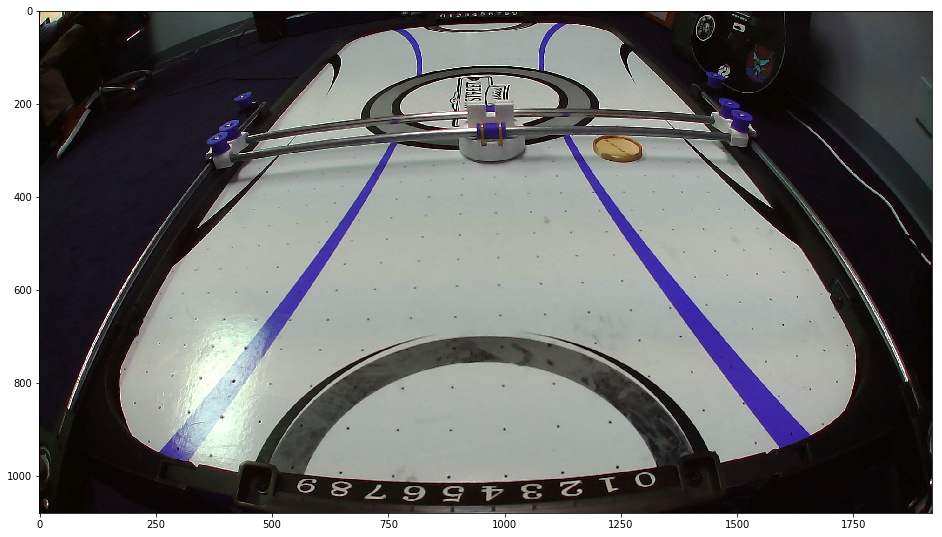

In [4]:
image=cv2.imread("Center_5.jpg")

orig = image.copy()

show_img(image)

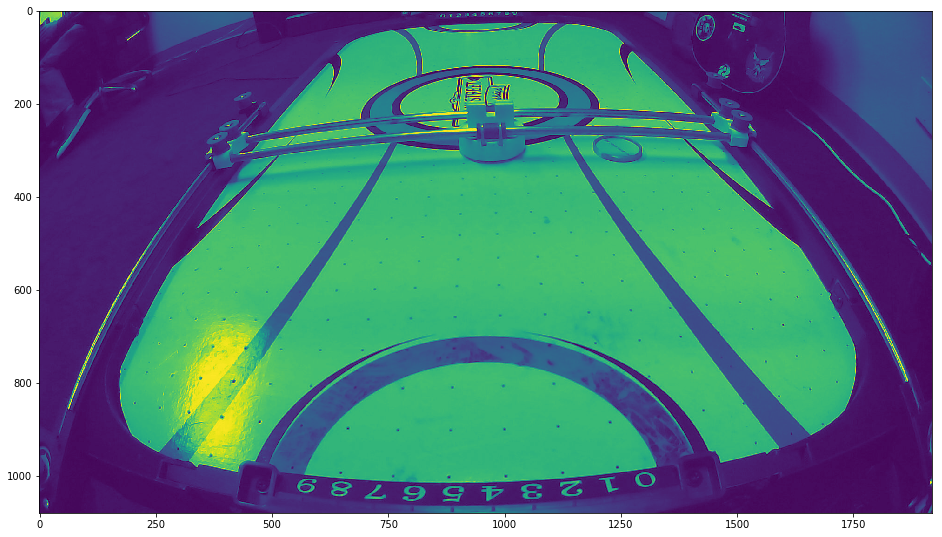

In [98]:
# convert the image to grayscale, blur it and find edges
height, width = image.shape[:2]
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

show_img(gray)

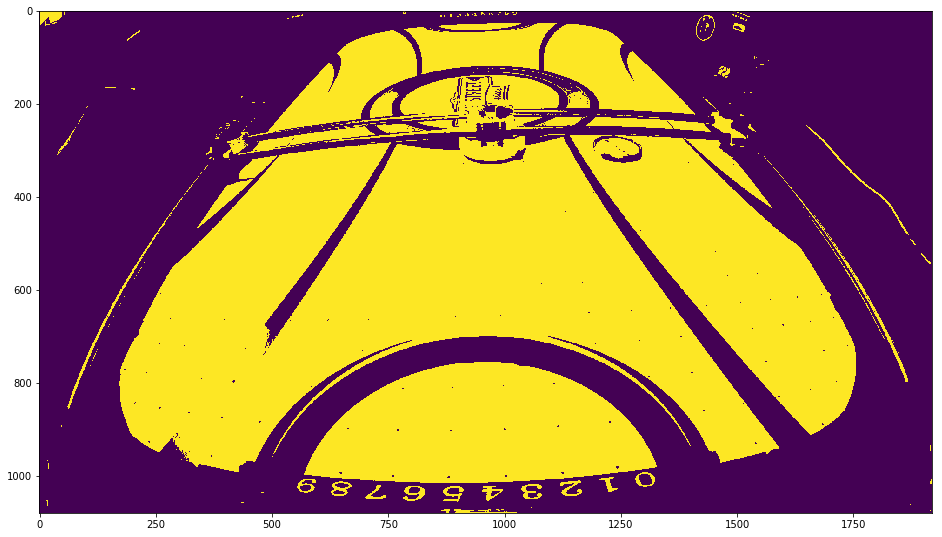

In [108]:
t, bw = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

show_img(bw)

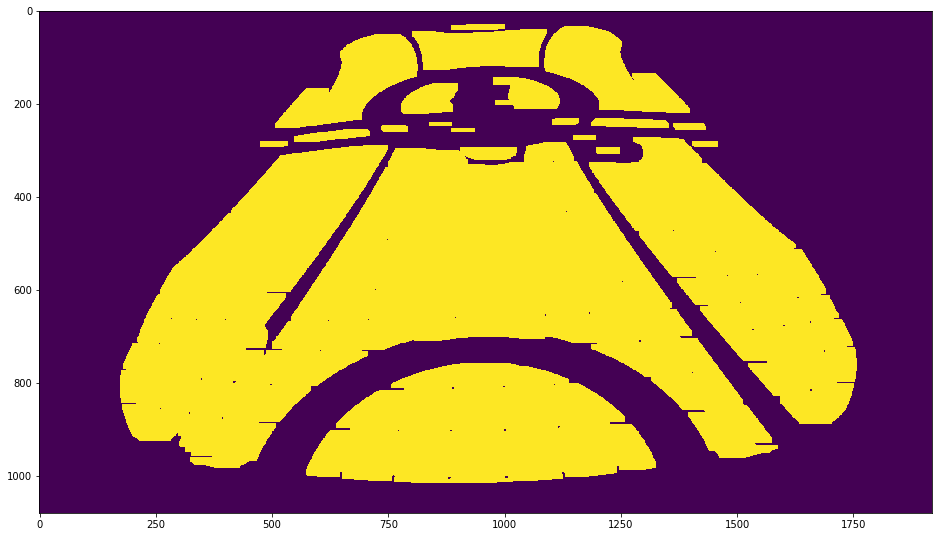

In [119]:
opened=cv2.morphologyEx(bw,cv2.MORPH_OPEN, np.ones((10,50)))
show_img(opened)

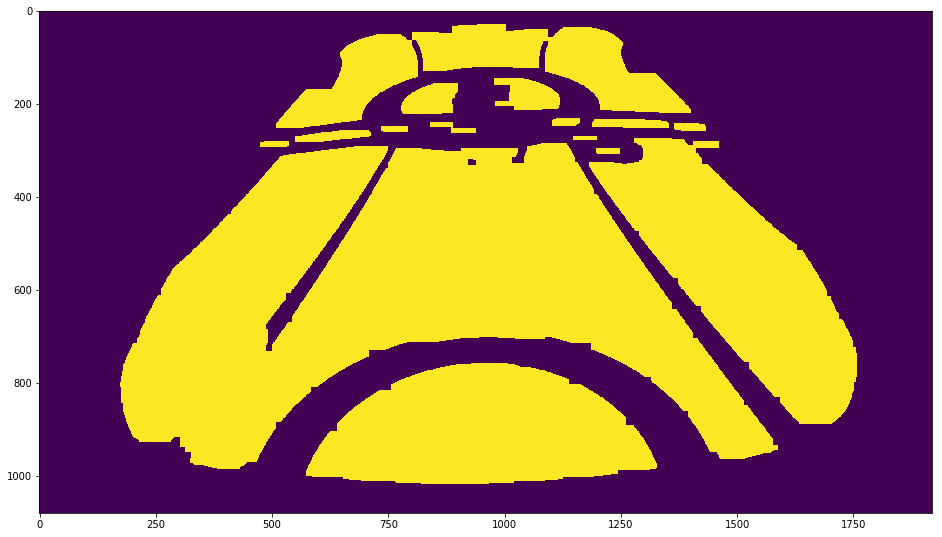

In [120]:
closed=cv2.morphologyEx(opened, cv2.MORPH_CLOSE, np.ones((10,10)))
show_img(closed)

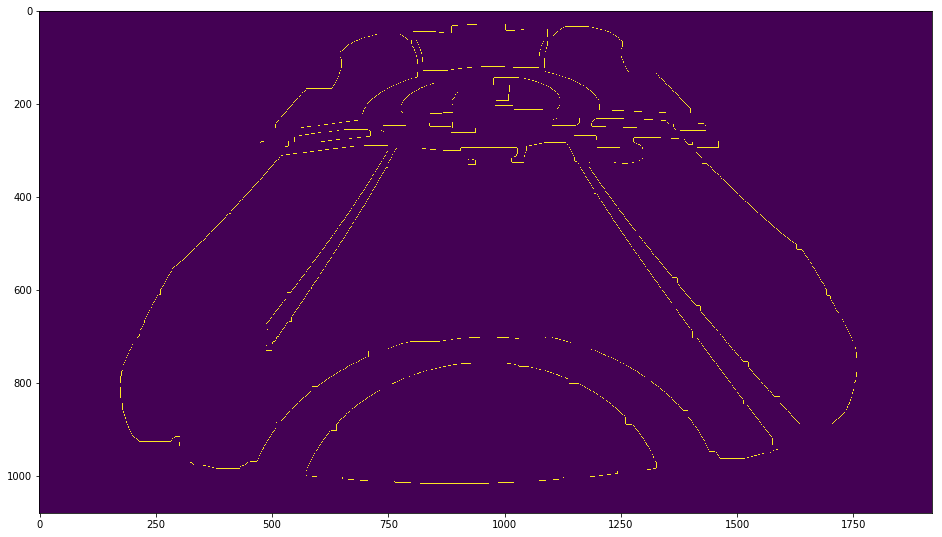

In [121]:
edges = cv2.Canny(closed,255,255)
show_img(edges)

In [122]:
xs, ys = np.where(edges > 0)
edgePts = np.array(zip(ys, xs))
    
image2, contours, hierarchy = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
#hull = cv2.convexHull(np.array(edgePts))

In [129]:
#len(contours)
edgePts

array([[ 942,   30],
       [ 943,   30],
       [ 944,   30],
       ...,
       [ 965, 1016],
       [ 966, 1016],
       [ 967, 1016]])

In [79]:
#image = orig.copy()
#cv2.drawContours(image, contours, -1, 255, 3)
#show_img(image)

In [124]:
#for i in range(0, len(hull)):
#    cv2.circle(image, tuple(hull[i][0]), 4, (255, 0, 0), -1)
    
#plt.figure(figsize=(16,16))
#plt.imshow(image)

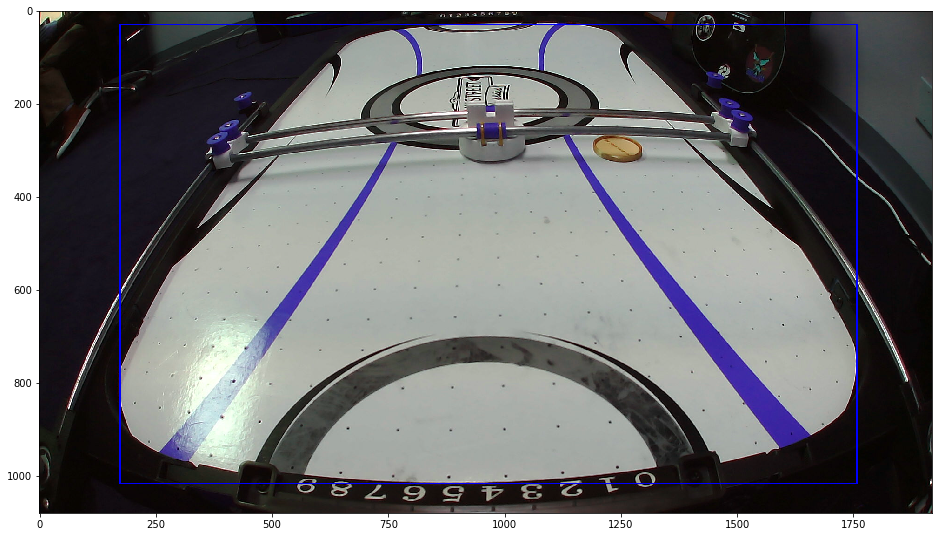

In [125]:
rect = cv2.minAreaRect(edgePts)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(image,[box],0,(0,0,255),2)

plt.figure(figsize=(16,16))
plt.imshow(image)

In [132]:
pts = []
for i in range(0, len(contours)):
    for j in range(0, len(contours[i])):
        pts.append(contours[i][j])

pts = np.array(pts)

a, triangle = cv2.minEnclosingTriangle(pts)

In [133]:
triangle

array([[[1998.8337 ,  977.7469 ]],

       [[ 942.5833 , -386.09302]],

       [[ -60.15207, 1054.0056 ]]], dtype=float32)

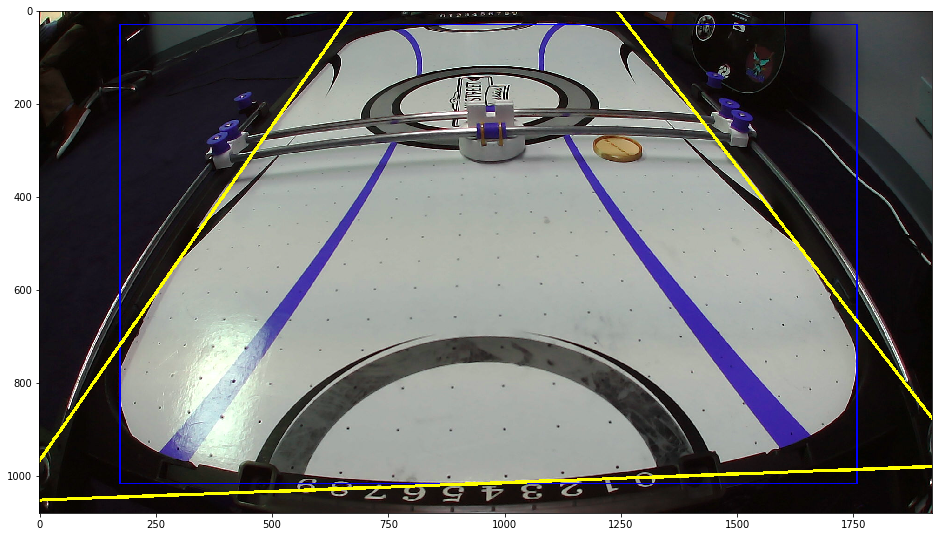

In [135]:
image = cv2.line(image, (triangle[0][0][0],triangle[0][0][1]), (triangle[1][0][0], triangle[1][0][1]), (255,255,0), 5)
image = cv2.line(image, (triangle[1][0][0],triangle[1][0][1]), (triangle[2][0][0], triangle[2][0][1]), (255,255,0), 5)
image = cv2.line(image, (triangle[2][0][0],triangle[2][0][1]), (triangle[0][0][0], triangle[0][0][1]), (255,255,0), 5)

show_img(image)

In [107]:
hullcp=hull.copy()
hullcp[4][0]

array([1663,  778], dtype=int32)

In [108]:
topLeft = None
topRight = None
botLeft = None
botRight = None

for i in range(0, len(hullcp)):
    if hullcp[i][0][1] < 60:
        if topRight is None:
            topRight = tuple(hullcp[i][0])
        else:
            if topRight[0] <= hullcp[i][0][0]:
                topRight = tuple(hullcp[i][0])
                
        if topLeft is None:
            topLeft = tuple(hullcp[i][0])
        else:
            if topLeft[0] >= hullcp[i][0][0]:
                topLeft = tuple(hullcp[i][0])
            

In [109]:
(topLeft, topRight)

((731, 53), (1198, 57))

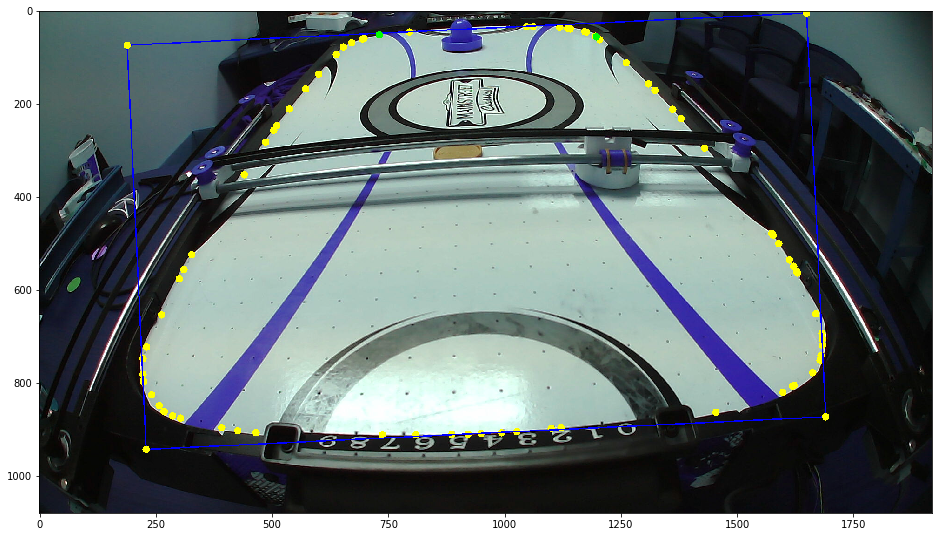

In [110]:
cv2.circle(image, topLeft, 8, (0, 255, 0), -1)
cv2.circle(image, topRight, 8, (0, 255, 0), -1)

plt.figure(figsize=(16,16))
plt.imshow(image)